In [1]:
import numpy as np
import pandas as pd
import bottleneck as bn
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kstest

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data.head()

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100


## Data Exploration
1. transform raw data to rectangular data
2. check the number of missing values
3. check the position of missing values
4. check the distribution of daily return and log volume

In [3]:
print('The number of stocks:', np.unique(raw_data['ticker']).size)
print('The number of dates:', np.unique(raw_data['date']).size)

price = raw_data.pivot(index = 'date', columns = 'ticker', values = 'last').sort_index()
volume = raw_data.pivot(index = 'date', columns = 'ticker', values = 'volume').sort_index()

np.nansum(np.isnan(price) != np.isnan(volume))

The number of stocks: 248
The number of dates: 2005


0

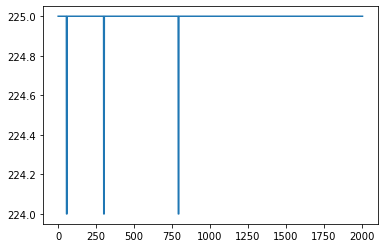

In [4]:
# check coverage
# plt.plot(np.nansum(np.isnan(price),axis=1)/price.shape[1])
plt.plot(np.nansum(~np.isnan(price),axis=1))
### 225 < 248

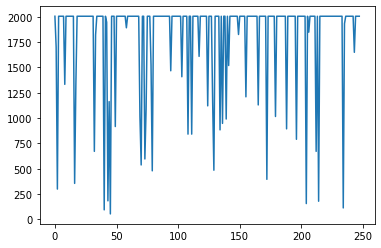

In [5]:
plt.plot(np.nansum(~np.isnan(price),axis=0))

c:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

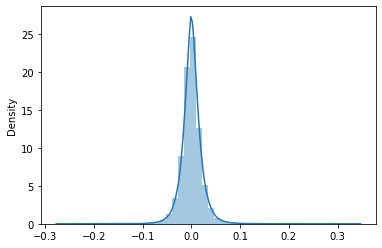

In [6]:
daily_return = price / price.shift(1) - 1.
# visualize the distribution
sns.distplot(daily_return)

In [7]:
# check the normality of daily return by KS test
rets = daily_return.values.flatten()
rets = rets[~np.isnan(rets)]
rets = (rets - np.mean(rets)) / np.std(rets)
kstest(rets, 'norm')
### p-value is close to zero
### reject the null hypothesis
### daily return doesn't follow a normal distribution

KstestResult(statistic=0.06148658772225102, pvalue=0.0)

c:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

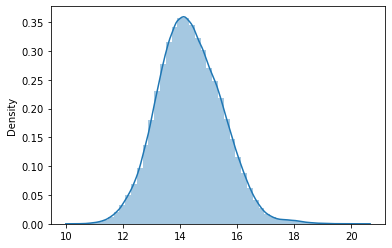

In [8]:
volume_1d = volume.values.flatten()
volume_1d[volume_1d == 0] = np.nan
sns.distplot(np.log(volume_1d))

In [9]:
volume_1d = volume_1d[~np.isnan(volume_1d)]
volume_1d = (volume_1d - np.mean(volume_1d)) / np.std(volume_1d)
kstest(volume_1d, 'norm')
### p-value is close to zero
### reject the null hypothesis
### log volume doesn't follow a normal distribution

KstestResult(statistic=0.3415464831018567, pvalue=0.0)

## Strategy & Backtest

In [10]:
from utils import Strategy, Backtest

In [11]:
strats = Strategy(price, volume)
backtest = Backtest(price)

c:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ANACONDA\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
c:\Users\loren\Downloads\data\utils.py:106: RuntimeWarning: Mean of empty slice
  return (signal - np.nanmean(signal, axis = 1).reshape(-1, 1)) / np.nanstd(signal, axis = 1).reshape(-1, 1)
c:\ANACONDA\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


{'period return': 22.56700216143659,
 'annual return': 2.8350505227935416,
 'annual volatility': 4.078014188153817,
 'sharpe ratio': 0.6952036927750402,
 'max drawdown': -4.876285543513316,
 'max drawdown begin date': '2016-08-08',
 'max drawdown end date': '2017-06-02',
 'winning ratio': 55.27638190954774}

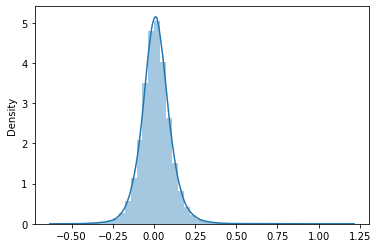

In [12]:
signal1_20 = strats.signal1(20)
sns.distplot(signal1_20)
backtest.get_result(signal1_20)

c:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ANACONDA\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
c:\Users\loren\Downloads\data\utils.py:106: RuntimeWarning: Mean of empty slice
  return (signal - np.nanmean(signal, axis = 1).reshape(-1, 1)) / np.nanstd(signal, axis = 1).reshape(-1, 1)
c:\ANACONDA\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


{'period return': -11.086876351367353,
 'annual return': -1.385859543920919,
 'annual volatility': 2.106488842468185,
 'sharpe ratio': -0.6579002537213059,
 'max drawdown': -11.678047090841659,
 'max drawdown begin date': '2013-08-27',
 'max drawdown end date': '2021-03-15',
 'winning ratio': 40.5}

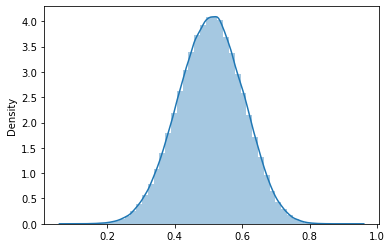

In [13]:
signal3_20 = strats.signal3(20)
sns.distplot(signal3_20)
backtest.get_result(signal3_20)

c:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ANACONDA\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
c:\Users\loren\Downloads\data\utils.py:106: RuntimeWarning: Mean of empty slice
  return (signal - np.nanmean(signal, axis = 1).reshape(-1, 1)) / np.nanstd(signal, axis = 1).reshape(-1, 1)
c:\ANACONDA\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


{'period return': -1.6780110159259967,
 'annual return': -0.2219591290907403,
 'annual volatility': 3.0328566557716217,
 'sharpe ratio': -0.07318483999840385,
 'max drawdown': -7.120532889620268,
 'max drawdown begin date': '2013-09-26',
 'max drawdown end date': '2018-02-26',
 'winning ratio': 50.264550264550266}

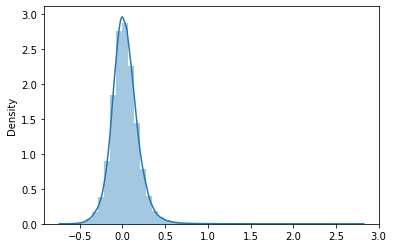

In [14]:
signal5_120_60 = strats.signal5(120,60)
sns.distplot(signal5_120_60)
backtest.get_result(signal5_120_60)